In [5]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
%matplotlib inline

In [64]:
data2009 = pd.read_csv('/Users/gregdhillon/modelingProject/FINISHED_DATA/metadata_Income/Data2009.csv')
data2010 = pd.read_csv('/Users/gregdhillon/modelingProject/FINISHED_DATA/metadata_Income/Data2010.csv')
data2011 = pd.read_csv('/Users/gregdhillon/modelingProject/FINISHED_DATA/metadata_Income/Data2011.csv')
data2012 = pd.read_csv('/Users/gregdhillon/modelingProject/FINISHED_DATA/metadata_Income/Data2012.csv')
data2013 = pd.read_csv('/Users/gregdhillon/modelingProject/FINISHED_DATA/metadata_Income/Data2013.csv')
data2014 = pd.read_csv('/Users/gregdhillon/modelingProject/FINISHED_DATA/metadata_Income/Data2014.csv')

In [65]:
frames = [data2009, data2010, data2011, data2012, data2013]
model_data = pd.concat(frames, axis=0, join='outer',copy=True)

In [66]:
def drop(df):
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna()

In [67]:
drop(model_data)
drop(data2014)

In [68]:
model_data = model_data[np.isfinite(model_data['Crime_rate'])]
data2014 = data2014[np.isfinite(data2014['Crime_rate'])]

In [69]:
import sklearn as sk
categories = ['Cardiovascular diseases',
       'Chronic respiratory diseases', 'HIV/AIDS and tuberculosis',
       'Nutritional deficiencies', 'Age', 'Unemployment_rate', 'Median income']
X_train = model_data[categories]
y_train = model_data[['Crime_rate']]
X_test = data2014[categories]
y_test = data2014[['Crime_rate']]
#X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, Y, test_size=0.1, random_state=101)

# Gradient Boosting

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit, train_test_split
from sklearn import metrics

In [18]:
gbm = GradientBoostingRegressor(n_estimators=100)
gbm.fit(X_train, y_train)
predictions = gbm.predict(X_test)

/Users/gregdhillon/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
print gbm.feature_importances_
print "R-squared for Train: %.2f" %gbm.score(X_train, y_train) 
print "R-squared for Test: %.2f" %gbm.score(X_test, y_test) 

[0.04553946 0.06898778 0.46583109 0.09046643 0.13226683 0.02477545
 0.17213296]
R-squared for Train: 0.68
R-squared for Test: 0.49


In [20]:
def GradientBooster(param_grid, n_jobs): 
    estimator = GradientBoostingRegressor() 
    cv = ShuffleSplit(X_train.shape[0], test_size=0.2)
    classifier = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs) 
    classifier.fit(X_train, y_train)
    print "Best Estimator learned through GridSearch" 
    print classifier.best_estimator_ 
    return cv, classifier.best_estimator_

In [21]:
param_grid={'n_estimators':[100], 
            'learning_rate': [0.1],
            'max_depth':[6], 
            'min_samples_leaf':[3], 
            'max_features':[1.0] } 
n_jobs=4 

In [22]:
cv,best_est=GradientBooster(param_grid, n_jobs)

Best Estimator learned through GridSearch
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=6, max_features=1.0,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)


In [23]:
print "Best Estimator Parameters" 
print"---------------------------" 
print "n_estimators: %d" %best_est.n_estimators 
print "max_depth: %d" %best_est.max_depth 
print "Learning Rate: %.1f" %best_est.learning_rate 
print "min_samples_leaf: %d" %best_est.min_samples_leaf 
print "max_features: %.1f" %best_est.max_features 
print
print "Train R-squared: %.2f" %best_est.score(X_train,y_train) 

Best Estimator Parameters
---------------------------
n_estimators: 100
max_depth: 6
Learning Rate: 0.1
min_samples_leaf: 3
max_features: 1.0

Train R-squared: 0.89


In [24]:
estimator = best_est 
#Re-fitting to the train set 
estimator.fit(X_train, y_train) 
#Calculating train/test scores - R-squared value 
print "Train R-squared: %.2f" %estimator.score(X_train, y_train) 
print "Test R-squared: %.2f" %estimator.score(X_test, y_test) 

Train R-squared: 0.89
Test R-squared: 0.55


# XGboost

In [79]:
import xgboost
from sklearn.metrics import explained_variance_score


In [83]:
def XGBooster(param_grid, n_jobs): 
    estimator = XGBRegressor() 
    cv = ShuffleSplit(X_train.shape[0], test_size=0.2)
    classifier = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=n_jobs) 
    classifier.fit(X_train, y_train)
    print "Best Estimator learned through GridSearch" 
    print classifier.best_estimator_ 
    return cv, classifier.best_estimator_

In [84]:
cv,best_est=GradientBooster(param_grid, n_jobs)

Best Estimator learned through GridSearch
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=6, max_features=1.0,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)


In [86]:
print "Best Estimator Parameters" 
print"---------------------------" 
print "n_estimators: %d" %best_est.n_estimators 
print "max_depth: %d" %best_est.max_depth 
print "Learning Rate: %.1f" %best_est.learning_rate 
print "min_samples_leaf: %d" %best_est.min_samples_leaf 
print "max_features: %.1f" %best_est.max_features 
print
print "Train R-squared: %.2f" %best_est.score(X_train,y_train) 

Best Estimator Parameters
---------------------------
n_estimators: 100
max_depth: 6
Learning Rate: 0.1
min_samples_leaf: 3
max_features: 1.0

Train R-squared: 0.89


In [85]:
estimator = best_est 
#Re-fitting to the train set 
estimator.fit(X_train, y_train) 
#Calculating train/test scores - R-squared value 
print "Train R-squared: %.2f" %estimator.score(X_train, y_train) 
print "Test R-squared: %.2f" %estimator.score(X_test, y_test) 

Train R-squared: 0.89
Test R-squared: 0.55


# Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor
def RandomForest(estimators):
    regressor = RandomForestRegressor(n_estimators=estimators, random_state=0)  
    regressor.fit(X_train, y_train)  
    y_pred = regressor.predict(X_test)
    print('Number of Trees: %.2f' %estimators)
    print('Mean Absolute Error: %.2f' %metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error: %.2f' %metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error: %.2f' %np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  
    print

In [26]:
num_trees = [10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 300]
for tree in num_trees:
    RandomForest(tree)

Number of Trees: 10.00

/Users/gregdhillon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.



Mean Absolute Error: 1199.93
Mean Squared Error: 2808359.39
Root Mean Squared Error: 1675.82

Number of Trees: 20.00
Mean Absolute Error: 1173.81
Mean Squared Error: 2672289.61
Root Mean Squared Error: 1634.71

Number of Trees: 40.00
Mean Absolute Error: 1148.27
Mean Squared Error: 2591695.36
Root Mean Squared Error: 1609.87

Number of Trees: 60.00
Mean Absolute Error: 1150.63
Mean Squared Error: 2582260.78
Root Mean Squared Error: 1606.94

Number of Trees: 80.00
Mean Absolute Error: 1145.03
Mean Squared Error: 2577631.64
Root Mean Squared Error: 1605.50

Number of Trees: 100.00
Mean Absolute Error: 1144.24
Mean Squared Error: 2548473.08
Root Mean Squared Error: 1596.39

Number of Trees: 120.00
Mean Absolute Error: 1144.38
Mean Squared Error: 2550032.25
Root Mean Squared Error: 1596.88

Number of Trees: 140.00
Mean Absolute Error: 1142.50
Mean Squared Error: 2544516.20
Root Mean Squared Error: 1595.15

Number of Trees: 160.00
Mean Absolute Error: 1141.31
Mean Squared Error: 2526714.46

# Neural Network

In [27]:
import tensorflow as tf
import keras
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

/Users/gregdhillon/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [28]:
model = Sequential()

# The Input Layer :
model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model.fit(X_train, y_train, batch_size = 10, epochs = 100)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
3792/3792 [==============================] - 1s 236us/step - loss: 2905.9924 - mean_absolute_error: 2905.9924
Epoch 2/100
3792/3792 [==============================] - 1s 165us/step - loss: 2814.5698 - mean_absolute_error: 2814.5698
Epoch 3/100
3792/3792 [==============================] - 1s 167us/step - loss: 2322.7762 - mean_absolute_error: 2322.7762
Epoch 4/100
3792/3792 [==============================] - 1s 165us/step - loss: 1946.8601 - mean_absolute_error: 1946.8601
Epoch 5/100
3792/3792 [==============================] - 1s 164us/step - loss: 1908.0937 - mean_absolute_error: 1908.0937
Epoch 6/100
3792/3792 [==============================] - 1s 167us/step - loss: 1847.2453 - mean_absolute_error: 1847.2453
Epoch 7/100
3792/3792 [==============================] - 1s 164us/step - loss: 1870.7118 - mean_absolute_error: 1870.7118
Epoch 8/100
3792/3792 [===

3792/3792 [==============================] - 1s 166us/step - loss: 1690.6120 - mean_absolute_error: 1690.6120
Epoch 63/100
3792/3792 [==============================] - 1s 163us/step - loss: 1681.0845 - mean_absolute_error: 1681.0845
Epoch 64/100
3792/3792 [==============================] - 1s 161us/step - loss: 1699.9815 - mean_absolute_error: 1699.9815
Epoch 65/100
3792/3792 [==============================] - 1s 164us/step - loss: 1678.3275 - mean_absolute_error: 1678.3275
Epoch 66/100
3792/3792 [==============================] - 1s 160us/step - loss: 1684.2901 - mean_absolute_error: 1684.2901
Epoch 67/100
3792/3792 [==============================] - 1s 162us/step - loss: 1668.4136 - mean_absolute_error: 1668.4136
Epoch 68/100
3792/3792 [==============================] - 1s 162us/step - loss: 1661.0173 - mean_absolute_error: 1661.0173
Epoch 69/100
3792/3792 [==============================] - 1s 162us/step - loss: 1676.7489 - mean_absolute_error: 1676.7489
Epoch 70/100
3792/3792 [=====

In [29]:
y_pred = model.predict(X_test)

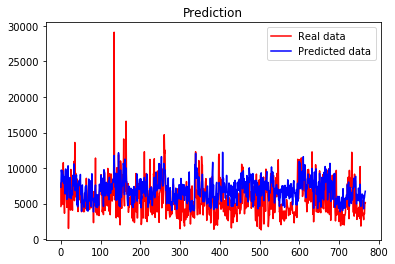

In [30]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

# Scaling the data

In [31]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

/Users/gregdhillon/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/gregdhillon/anaconda2/lib/python2.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/gregdhillon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


# Gradient Boosting With scaled data

In [32]:
gbm = GradientBoostingRegressor(n_estimators=100)
gbm.fit(X_train, y_train)
predictions = gbm.predict(X_test)

In [33]:
print gbm.feature_importances_
print "R-squared for Train: %.2f" %gbm.score(X_train, y_train) 
print "R-squared for Test: %.2f" %gbm.score(X_test, y_test) 

[0.04569006 0.06921523 0.46621746 0.08952324 0.13207484 0.02468518
 0.17259398]
R-squared for Train: 0.68
R-squared for Test: 0.49


In [34]:
cv,best_est=GradientBooster(param_grid, n_jobs)

Best Estimator learned through GridSearch
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=6, max_features=1.0,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)


In [35]:
print "Best Estimator Parameters" 
print"---------------------------" 
print "n_estimators: %d" %best_est.n_estimators 
print "max_depth: %d" %best_est.max_depth 
print "Learning Rate: %.1f" %best_est.learning_rate 
print "min_samples_leaf: %d" %best_est.min_samples_leaf 
print "max_features: %.1f" %best_est.max_features 
print
print "Train R-squared: %.2f" %best_est.score(X_train,y_train) 

Best Estimator Parameters
---------------------------
n_estimators: 100
max_depth: 6
Learning Rate: 0.1
min_samples_leaf: 3
max_features: 1.0

Train R-squared: 0.89


In [36]:
estimator = best_est 
#Re-fitting to the train set 
estimator.fit(X_train, y_train) 
#Calculating train/test scores - R-squared value 
print "Train R-squared: %.2f" %estimator.score(X_train, y_train) 
print "Test R-squared: %.2f" %estimator.score(X_test, y_test) 

Train R-squared: 0.89
Test R-squared: 0.55


# Random Forest With Scaled data

In [37]:
num_trees = [10, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 300]
for tree in num_trees:
    RandomForest(tree)

Number of Trees: 10.00
Mean Absolute Error: 1200.58
Mean Squared Error: 2814686.91

/Users/gregdhillon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.



Root Mean Squared Error: 1677.70

Number of Trees: 20.00
Mean Absolute Error: 1173.64
Mean Squared Error: 2677619.03
Root Mean Squared Error: 1636.34

Number of Trees: 40.00
Mean Absolute Error: 1149.14
Mean Squared Error: 2596100.79
Root Mean Squared Error: 1611.24

Number of Trees: 60.00
Mean Absolute Error: 1150.35
Mean Squared Error: 2583392.46
Root Mean Squared Error: 1607.29

Number of Trees: 80.00
Mean Absolute Error: 1144.96
Mean Squared Error: 2579447.49
Root Mean Squared Error: 1606.07

Number of Trees: 100.00
Mean Absolute Error: 1144.52
Mean Squared Error: 2550757.04
Root Mean Squared Error: 1597.11

Number of Trees: 120.00
Mean Absolute Error: 1144.42
Mean Squared Error: 2551404.60
Root Mean Squared Error: 1597.31

Number of Trees: 140.00
Mean Absolute Error: 1142.75
Mean Squared Error: 2547672.64
Root Mean Squared Error: 1596.14

Number of Trees: 160.00
Mean Absolute Error: 1141.79
Mean Squared Error: 2530719.46
Root Mean Squared Error: 1590.82

Number of Trees: 180.00
M

# Neural Network with Scaled Data

In [38]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
3792/3792 [==============================] - 1s 236us/step - loss: 3087.5918 - mean_absolute_error: 3087.5918
Epoch 2/100
3792/3792 [==============================] - 1s 165us/step - loss: 1519.5226 - mean_absolute_error: 1519.5226
Epoch 3/100
3792/3792 [==============================] - 1s 166us/step - loss: 1412.1103 - mean_absolute_error: 1412.1103
Epoch 4/100
3792/3792 [==============================] - 1s 166us/step - loss: 1409.2554 - mean_absolute_error: 1409.2554
Epoch 5/100
3792/3792 [==============================] - 1s 166us/step - loss: 1412.1632 - mean_absolute_error: 1412.1632
Epoch 6/100
3792/3792 [==============================] - 1s 166us/step - loss: 1406.9705 - mean_absolute_error: 1406.9705
Epoch 7/100
3792/3792 [==============================] - 1s 167us/step - loss: 1383.8310 - mean_absolute_error: 1383.8310
Epoch 8/100
3792/3792 [==============================] - 1s 167us/step - loss: 1378.4253 - mean_absolute_error: 1378.4253
Epoch 9/100
3792/3792 [=

3792/3792 [==============================] - 1s 169us/step - loss: 1285.5860 - mean_absolute_error: 1285.5860
Epoch 68/100
3792/3792 [==============================] - 1s 164us/step - loss: 1290.0646 - mean_absolute_error: 1290.0646
Epoch 69/100
3792/3792 [==============================] - 1s 167us/step - loss: 1277.8450 - mean_absolute_error: 1277.8450
Epoch 70/100
3792/3792 [==============================] - 1s 166us/step - loss: 1274.0818 - mean_absolute_error: 1274.0818
Epoch 71/100
3792/3792 [==============================] - 1s 165us/step - loss: 1287.6302 - mean_absolute_error: 1287.6302
Epoch 72/100
3792/3792 [==============================] - 1s 167us/step - loss: 1277.7796 - mean_absolute_error: 1277.7796
Epoch 73/100
3792/3792 [==============================] - 1s 164us/step - loss: 1273.8557 - mean_absolute_error: 1273.8557
Epoch 74/100
3792/3792 [==============================] - 1s 168us/step - loss: 1276.8565 - mean_absolute_error: 1276.8565
Epoch 75/100
3792/3792 [=====

In [39]:
y_pred = model.predict(X_test)

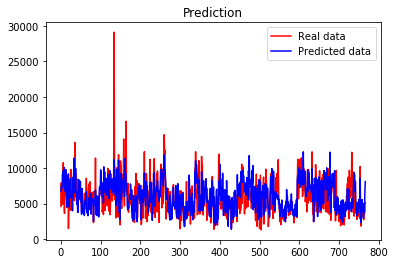

In [40]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()